
## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 2: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, 21th September submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Task 1: Logistic Regression on PCA components

In the following code, you have to add a few lines to apply logistic regression to the PCA components. More specifically:

 0. Load the Iris Dataset
 1. Implement Standard Scalar based feature extraction
 2. Implement PCA and use all components and compute the explained variance of each PCA component
 3. Implement PCA and use two components that explain maximum variance. Implement logistic regression model to train and test and give a visual display of the performance by showing a plot of the decision regions along with the test data. Print the test accuracy.

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

## Load Iris Dataset and use all four features
### Playing around with missing values


import numpy as np
import pandas as pd

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    color='green',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

test accuracy unstandadize data: 0.8222222222222222


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


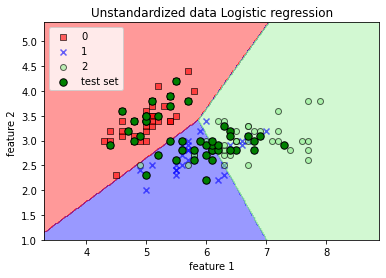

In [3]:

iris = pd.read_csv('Iris.csv')
# The first 50 entries are setosa and the next 50 are versicolor
# extract sepal length and petal length
X_iris = iris.iloc[:, 1:5].values
y_iris = iris.iloc[:, 5].values

#y_iris_categorical = {i:j for i, j in enumerate(y_iris)}
y_iris[y_iris == 'Iris-setosa'] = 0
y_iris[y_iris == 'Iris-versicolor'] = 1
y_iris[y_iris == 'Iris-virginica'] = 2

from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=0)

y_train=y_train.astype('int')
y_test=y_test.astype('int')


## Case 1: Use Un standardised data to train logistic regression to scale the features
from sklearn.linear_model import LogisticRegression
clf_un_std = LogisticRegression(random_state=0).fit(X_train[:, :2], y_train)
predictions = clf_un_std.predict(X_test[:, :2])
test_score_un_std = clf_un_std.score(X_test[:, :2], y_test)
print("test accuracy unstandadize data: {}".format(test_score_un_std))

X_combined = np.vstack((X_train[:, :2], X_test[:, :2]))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=clf_un_std, test_idx=range(105, 150))
plt.title('Unstandardized data Logistic regression')
plt.xlabel('feature 1')
plt.ylabel('feature 2 ')
plt.legend(loc='upper left')



In [4]:
## Standardize : 
#Since here i am using first two feature I am standardising on them only

scaler = preprocessing.StandardScaler().fit(X_train[:, :2])
X_train_std_2 = scaler.transform(X_train[:, :2])
X_test_std_2 = scaler.transform(X_test[:, :2])

# perform logistic regression on this data 
from sklearn.linear_model import LogisticRegression
clf_std = LogisticRegression(random_state=6).fit(X_train_std_2, y_train)
predictions = clf_std.predict(X_test_std_2)
test_score_std = clf_std.score(X_test_std_2, y_test)
print("test accuracy standadized data: {}".format(test_score_std))


test accuracy standadized data: 0.8222222222222222


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


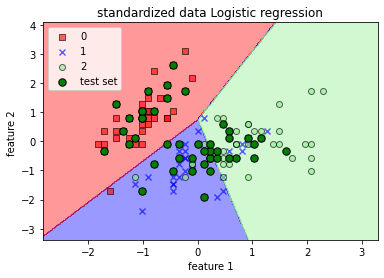

In [5]:
X_combined = np.vstack((X_train_std_2, X_test_std_2))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=clf_std, test_idx=range(105, 150))
plt.title('standardized data Logistic regression')
plt.xlabel('feature 1')
plt.ylabel('feature 2 ')
plt.legend(loc='upper left')



In [6]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [7]:
## Implement PCA and use all components 
## giving the explained variance of each Principal Component

import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvalues sorted  \n%s' % sorted(eigen_vals, reverse=True))


Eigenvalues 
[0.01681717 0.13476983 0.98710977 2.89976476]

Eigenvalues sorted  
[2.899764762828678, 0.9871097709928653, 0.13476983332506137, 0.016817171314929602]


In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

##explained variance of each Principal Component in sorted order
var_exp

[0.7180369888909115,
 0.24442718138870978,
 0.03337157777572952,
 0.00416425194464924]

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

eigen_pairs

[(2.899764762828678,
  array([-0.5355004 ,  0.20419539, -0.58617426, -0.57266334])),
 (0.9871097709928653,
  array([ 3.25611548e-01,  9.44913832e-01, -9.09058855e-04,  3.33787741e-02])),
 (0.13476983332506137,
  array([ 0.73204127, -0.23026338, -0.13706186, -0.62634528])),
 (0.016817171314929602,
  array([ 0.26708056, -0.11144895, -0.7985067 ,  0.52785808]))]

In [10]:
W = []
for i in range(0, len(eigen_pairs)):
    #W = np.concatenate((W, eigen_pairs[i][1][:, np.newaxis], 1))
    W.append(eigen_pairs[i][1])
    
all_principal_componenets = np.array(W).T
#print('Matrix W:\n', W)
print('Matrix W:\n', all_principal_componenets)

Matrix W:
 [[-5.35500399e-01  3.25611548e-01  7.32041268e-01  2.67080558e-01]
 [ 2.04195389e-01  9.44913832e-01 -2.30263378e-01 -1.11448955e-01]
 [-5.86174262e-01 -9.09058855e-04 -1.37061857e-01 -7.98506703e-01]
 [-5.72663340e-01  3.33787741e-02 -6.26345277e-01  5.27858078e-01]]


In [11]:
W[0:2]

[array([-0.5355004 ,  0.20419539, -0.58617426, -0.57266334]),
 array([ 3.25611548e-01,  9.44913832e-01, -9.09058855e-04,  3.33787741e-02])]

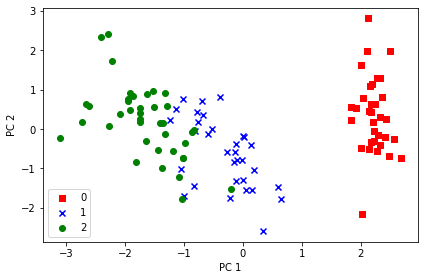

In [12]:
import matplotlib.pyplot as plt
X_train_pca = X_train_std.dot(all_principal_componenets)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
## Plotting the first two componenets
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

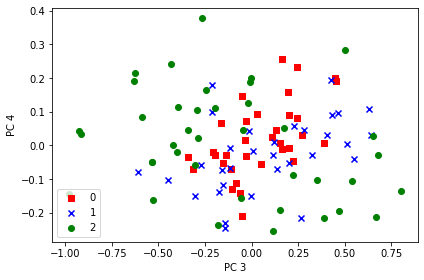

In [13]:
## Plotting the next two componenets These components do not capture much of the information as can be seen in the plots

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 2], 
                X_train_pca[y_train == l, 3], 
                c=c, label=l, marker=m)

plt.xlabel('PC 3')
plt.ylabel('PC 4')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [14]:
X_train_pca

array([[ 3.36649813e-01, -2.59032124e+00,  5.93813676e-03,
        -1.60852822e-02],
       [-1.36078228e+00,  1.53828650e-01, -5.69508839e-02,
        -1.56966954e-01],
       [-1.92477606e+00,  9.03740358e-01, -6.25477916e-01,
         2.14325095e-01],
       [-1.04175988e+00, -1.76627422e+00,  2.22769346e-01,
        -8.83306409e-02],
       [-1.81385443e+00, -8.47276350e-01,  3.50026300e-01,
        -1.02281641e-01],
       [-3.28396878e-03, -1.28678596e+00,  1.36073046e-01,
        -6.92887177e-02],
       [-2.66114315e+00,  6.22723850e-01,  5.01175182e-01,
         2.82892482e-01],
       [-6.90218611e-01,  7.16372211e-01, -1.59851077e-01,
        -7.43507833e-02],
       [ 4.42308167e-02, -1.53916218e+00,  1.12241515e-01,
        -3.00599585e-02],
       [-1.18168497e+00, -5.65836576e-01, -2.16663977e-02,
         1.24707761e-01],
       [-9.79568332e-01, -3.63698556e-01,  1.52264813e-01,
        -1.93210384e-01],
       [-2.11391709e-01, -1.52251867e+00, -9.80136113e-01,
      

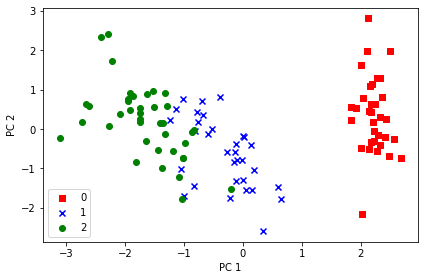

In [15]:
#Implement PCA and use two components that explain maximum variance. 
#Implement logistic regression model to train and test and give a visual display of the performance 
#by showing a plot of the decision regions along with the test data. Print the test accuracy.


## Use 2 components that explain maximum variance and perform a 
## ML study using Logistic Regression model
import matplotlib.pyplot as plt
principal_componenets_first_two = all_principal_componenets[:, :2]
#print('Matrix W:\n', W)
X_train_pca_two_componenets = X_train_std.dot(principal_componenets_first_two)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca_two_componenets[y_train == l, 0], 
                X_train_pca_two_componenets[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('pca-raschka.png', dpi=300)
plt.show()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_pca_two_componenets, y_train)

In [16]:
X_test_pca = X_test_std.dot(principal_componenets_first_two)
predictions = clf.predict(X_test_pca)
test_score = clf.score(X_test_pca, y_test)
print("test accuracy")

test_score

test accuracy


0.8666666666666667

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


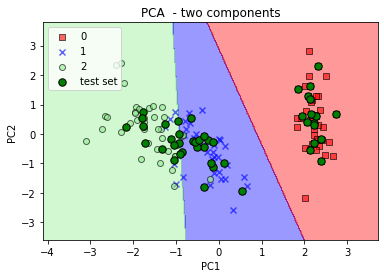

In [17]:
# Lets plot our decision regions to visualize how well the classification worked
#give a visual display of the performance 
#by showing a plot of the decision regions along with the test data.
#

        
X_combined = np.vstack((X_train_pca_two_componenets, X_test_pca))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=clf, test_idx=range(105, 150))
plt.title('PCA  - two components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')


### Explain what you observed?
 

# Task 2 

In this exercise, we will take two features from the iris dataset and train using AdalineGD vs. AdalineSGD based on the implementation provided below and the perceptron model implementations from scikit-learn and one provided below.  
You should have three plots (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) along with performance comparison between these four methods. What do you observe in terms of performance difference? Please explain your interpretation.

However, you are free to use any combination of two features out of 4 features given in this dataset. 


In [18]:
# Lets plot our decision regions to visualize how well the classification worked
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [19]:
# Sebastian Raschka's implementation of the Adaline Rule
class AdalineGD(object):
    """ADAptive LInear Neuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50, debug=False):
        self.eta = eta
        self.n_iter = n_iter
        self.debug = debug

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] =self.w_[1:] + (self.eta * X.T.dot(errors))
            self.w_[0] = self.w_[0] + (self.eta * errors.sum())
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if self.debug: print("New Weights:", self.w_)
            if self.debug: print("Cost:", cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here
X_iris_2features = X_iris[:,:2]
X_train_2features, X_test_2features, y_train, y_test = train_test_split(
    X_iris_2features, y_iris, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train_2features)
X_train_2features_std = scaler.transform(X_train_2features)
X_test_2features_std = scaler.transform(X_test_2features)
y_train=y_train.astype('int')
y_test=y_test.astype('int')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ada = AdalineGD(n_iter=10,eta=0.01, debug=True)
ada.fit(X_train_2features_std,y_train)
# Step3: Use the model to predict the test data
y_pred = ada.predict(X_test_2features_std)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(np.array(y_test),np.array(y_pred)))

Initial Weights: [0. 0. 0.]
New Weights: [ 1.1         0.69020908 -0.31243069]
Cost: 94.0
New Weights: [ 1.045       0.64380998 -0.27054524]
Cost: 10.080493236312245
New Weights: [ 1.04775     0.64772377 -0.2744051 ]
Cost: 9.758605734625782
New Weights: [ 1.0476125   0.6473812  -0.27406318]
Cost: 9.7568687298414
New Weights: [ 1.04761937  0.64741134 -0.27409331]
Cost: 9.756857150124144
New Weights: [ 1.04761903  0.64740869 -0.27409066]
Cost: 9.756857065062238
New Weights: [ 1.04761905  0.64740892 -0.27409089]
Cost: 9.75685706441453
New Weights: [ 1.04761905  0.6474089  -0.27409087]
Cost: 9.756857064409541
New Weights: [ 1.04761905  0.6474089  -0.27409087]
Cost: 9.7568570644095
New Weights: [ 1.04761905  0.6474089  -0.27409087]
Cost: 9.7568570644095
Misclassified samples: 27
Accuracy: 0.40


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


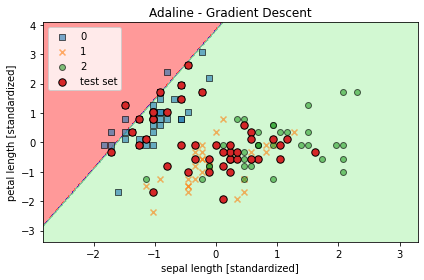

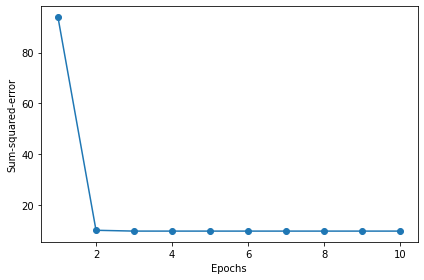

In [20]:
X_combined = np.vstack((X_train_2features_std, X_test_2features_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=ada,test_idx=range(105, 150))
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./adalineGD.png', dpi=300)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

In [21]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [22]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [23]:
## I observe that Adaline algorithm assigns everythings a negative category . SInce I am trying to perform a binary 
##classification on a data set which has 3 classes.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


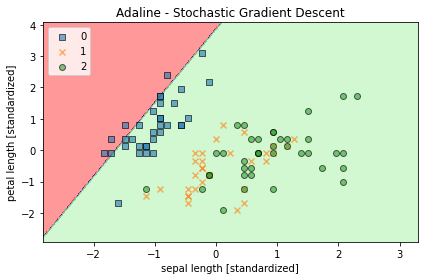

In [24]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

adasgd = AdalineSGD(n_iter=5, eta=0.01, random_state=1)
# We are using all but the first input sample to train (no split)


adasgd.fit(X_train_2features_std[1:, :], y_train[1:])

plot_decision_regions(X_train_2features_std[1:, :], y_train[1:], classifier=adasgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('adalineSGD.png', dpi=300)
plt.show()

In [25]:
## Partial fitting Adaline SGD

adasgd.partial_fit(X_train_2features_std[0, :], y_train[0])

In [26]:

y_pred = adasgd.predict(X_test_2features_std)


In [27]:
# Lets see how good we did
print("Adaline SGD ")
## Adaline SGD accuracy
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(np.array(y_test),np.array(y_pred)))

Adaline SGD 
Misclassified samples: 27
Accuracy: 0.40


In [28]:
## Scikit perceptron

## Scikit perceptron
print("Scikit perceptron")
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
print()
ppn = Perceptron(max_iter=200, eta0=0.01, random_state=3)
ppn.fit(X_train_2features_std, y_train)
y_pred = ppn.predict(X_test_2features_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Scikit perceptron

Misclassified samples: 9
Accuracy: 0.80


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


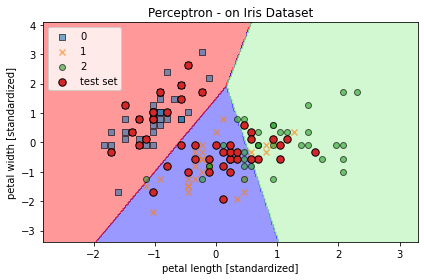

In [29]:
X_combined_std = np.vstack((X_train_2features_std, X_test_2features_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('iris_perceptron_scikit.png', dpi=300)
plt.show()

In [30]:
# Sebastian Raschka's implementation of the Perceptron Learning rule
import numpy as np

class Perceptron_2(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01,n_iter=10,debug=False,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
        self.debug = debug

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for iter in range(self.n_iter):
            errors = 0
            if self.debug: print("Iteration:", iter)
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.debug: print(xi, target, self.predict(xi), update)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if self.debug: print("New Weights:", self.w_)
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    
  


In [31]:
## Our perceptron 
print("Sebastian Raschka's perceptron")
ppn = Perceptron_2(n_iter=400, eta=0.1, random_seed=1)
ppn.fit(X_train_2features_std, y_train)
y_pred = ppn.predict(X_test_2features_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Sebastian Raschka's perceptron
Misclassified samples: 27
Accuracy: 0.40


In [32]:
y_pred

array([ 1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


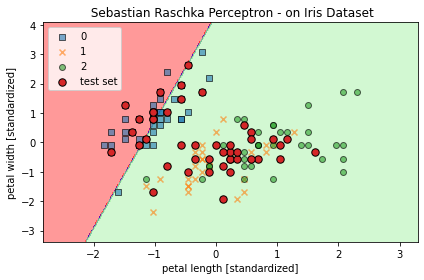

In [33]:

X_combined_std = np.vstack((X_train_2features_std, X_test_2features_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title(' Sebastian Raschka Perceptron - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('iris_perceptron_scikit.png', dpi=300)
plt.show()

In [34]:
#You should have three plots (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) 
#along with performance comparison between these four methods. 
#What do you observe in terms of performance difference? Please explain your interpretation.
'''
What I observed:

Adaline : accuracy 0.40
Adaline SGD : accuracy 0.40
Scikit Perceptron : accuracy : 0.80
Sebastian Perceptron : accuracy : 0.40
 SInce the Adaline,  Adaline SGD , and Sebastian Perceptron does not take into account that we are dealing with 3 classes
 instead of 2, they give bad accuracy . They classify  everything as -1 negative class and hence the accuracy is same for all three
 .
 Whereas scikit-perceptron gives a good relative accuarcy as it is internally running three binary models and then 
 predicting on the basis of the model with the highest probability. Hence it perfoms much better .

'''

'\nWhat I observed:\n\nAdaline : accuracy 0.40\nAdaline SGD : accuracy 0.40\nScikit Perceptron : accuracy : 0.80\nSebastian Perceptron : accuracy : 0.40\n SInce the Adaline,  Adaline SGD , and Sebastian Perceptron does not take into account that we are dealing with 3 classes\n instead of 2, they give bad accuracy . They classify  everything as -1 negative class and hence the accuracy is same for all three\n .\n Whereas scikit-perceptron gives a good relative accuarcy as it is internally running three binary models and then \n predicting on the basis of the model with the highest probability. Hence it perfoms much better .\n\n'

We have seen that the 'C' parameter in logistic regression determines the strength of logistic regression. In this exercise, you will tune the 'C' parameter to get best performance from the model for iris data classification. 
Write the code to run logistic regression on iris data and report the performance for 10 different values of 'C' (just Accuracy will do).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=0)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

C_samples = [0.005, 0.1, 0.5, 1., 5., 10, 50., 100., 500., 1000.]
accuracy = []
for c in C_samples:
    lr = LogisticRegression(C=c, random_state=0, multi_class="ovr") 
    lr.fit(X_train_std, y_train) # Learning from the training data
    # predict on the test data
    y_pred = lr.predict(X_test_std)
    # Lets see how good we did
    print('Misclassified samples: %d' %(y_test != y_pred).sum())
    from sklearn.metrics import accuracy_score
    print("value of C : {}".format(c)) 
    
    print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))

Misclassified samples: 17
value of C : 0.005
Accuracy: 0.62
Misclassified samples: 11
value of C : 0.1
Accuracy: 0.76
Misclassified samples: 5
value of C : 0.5
Accuracy: 0.89
Misclassified samples: 4
value of C : 1.0
Accuracy: 0.91
Misclassified samples: 2
value of C : 5.0
Accuracy: 0.96
Misclassified samples: 2
value of C : 10
Accuracy: 0.96
Misclassified samples: 1
value of C : 50.0
Accuracy: 0.98
Misclassified samples: 1
value of C : 100.0
Accuracy: 0.98
Misclassified samples: 1
value of C : 500.0
Accuracy: 0.98
Misclassified samples: 1
value of C : 1000.0
Accuracy: 0.98


## Task 4 Explore parameter tuning in SVM

Similar to the previous task, use the SVM model for various kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and report the performance (just Accuracy will do). 

In [37]:
from sklearn.svm import SVC
kernel_samples = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy = []
for kernel in kernel_samples:               
    svm = SVC(kernel=kernel, C=10.0, random_state=0)
    svm.fit(X_train_std, y_train)
    # Use the SVM model to predict the test data
    y_pred = svm.predict(X_test_std)
    # Lets see how good we did
    print('Misclassified samples: %d' %(y_test != y_pred).sum())
    from sklearn.metrics import accuracy_score
    print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))


Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 2
Accuracy: 0.96
Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 3
Accuracy: 0.93


In [38]:
for acc in accuracy:
    print('Accuracy: %.2f' % acc)

Accuracy: 0.98
Accuracy: 0.96
Accuracy: 0.98
Accuracy: 0.93
